# **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# **Loding Data**

In [3]:
train = pd.read_csv(r"train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Exploring,Cleaning **

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.drop(columns=['Ticket','PassengerId','Name','Cabin'],inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
survival_rate = sum(train["Survived"])/len(train["Survived"])
print("% of Passengers survived",survival_rate)

% of Passengers survived 0.3838383838383838


In [9]:
# in train dataframe which passenger class the majority

majority_class = train['Pclass'].mode()[0]
print("Majority of passengers were in class:", majority_class)


Majority of passengers were in class: 3


In [10]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

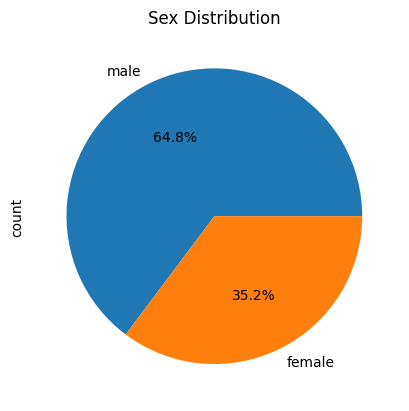

In [11]:
train['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()



# **Analyse Categorical Variables**


In [12]:
train[['Sex','Survived']].groupby(['Sex']).mean()
# Gender: Females had a significantly higher survival rate compared to males.

,Survived
Sex,
female,0.742038
male,0.188908


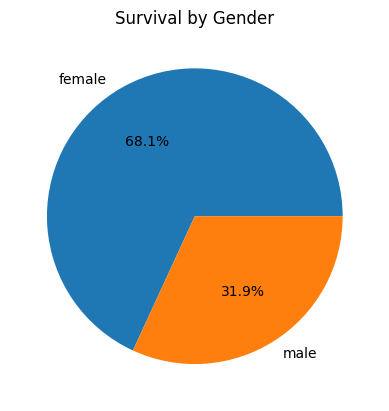

In [13]:
plt.pie(train.groupby('Sex')['Survived'].sum(), labels=train.groupby('Sex')['Survived'].sum().index,autopct='%1.1f%%')
plt.title('Survival by Gender')
plt.show()

In [14]:
# in train dataframe calc avg of ages

average_age = train['Age'].mean()
print("Average age of passengers:", average_age)


Average age of passengers: 29.69911764705882


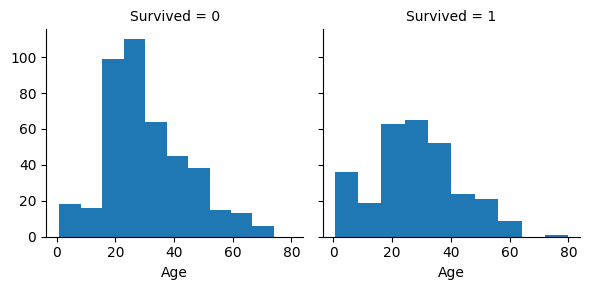

In [15]:
sns.FacetGrid(train, col= 'Survived').map(plt.hist, 'Age')





<Axes: xlabel='Age', ylabel='Count'>

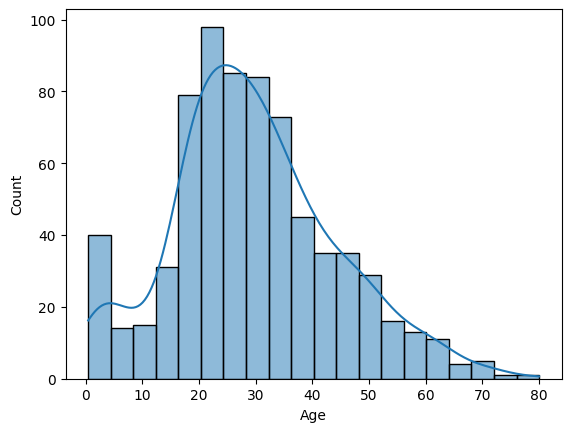

In [16]:
sns.histplot(train['Age'],kde=True)


In [17]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()
# Higher class passengers had a better chance of survival, with 1st class having the highest survival rate.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


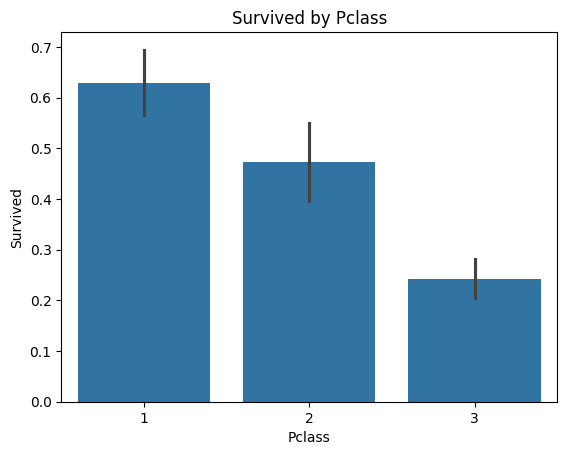

In [18]:
sns.barplot(x='Pclass',y='Survived',data=train)
plt.title("Survived by Pclass")
plt.show()

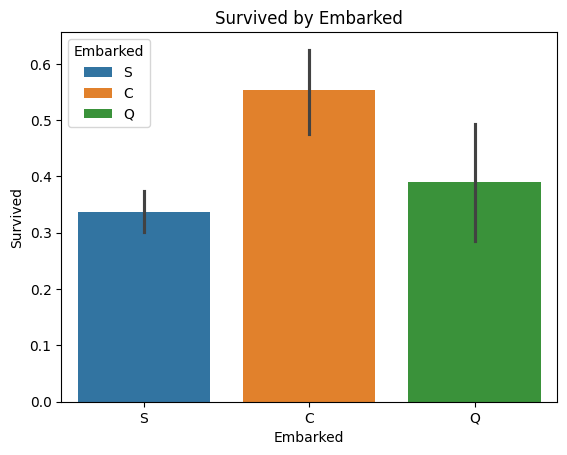

In [19]:
sns.barplot(x='Embarked',y='Survived',data=train, hue= 'Embarked')
plt.title("Survived by Embarked")
plt.show()

# **Analyise Numerical Values**

In [20]:
pd.pivot_table(train, index="Survived", values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


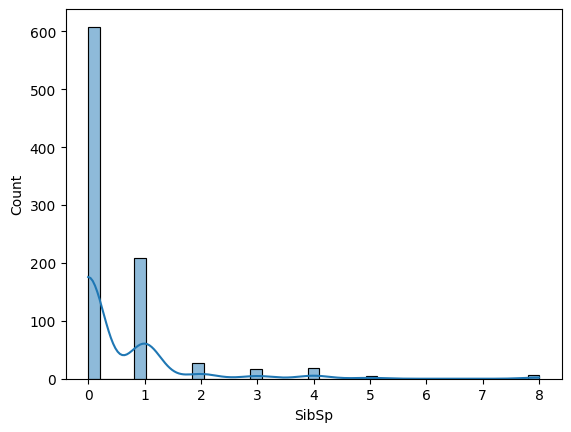

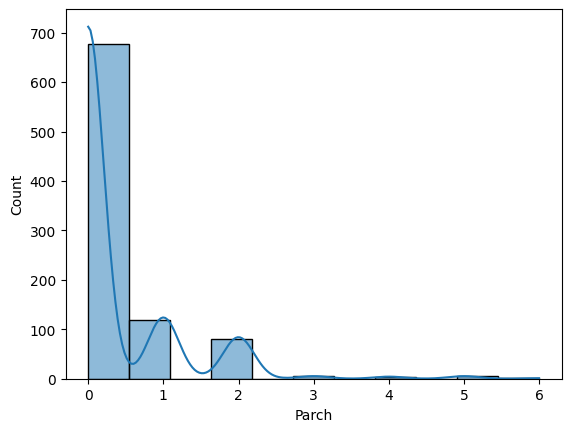

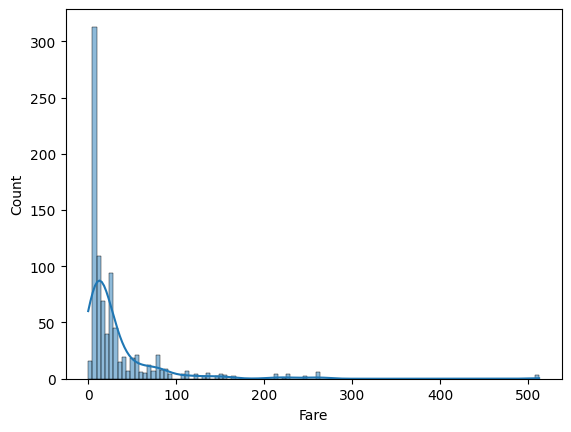

In [21]:
df = train[['SibSp','Parch','Fare']]
for i in df:
  sns.histplot(df[i],kde=True)
  plt.show()

<Axes: >

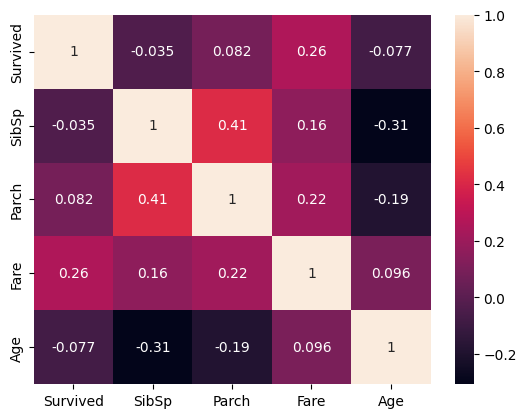

In [22]:
sns.heatmap(train[['Survived','SibSp','Parch','Fare','Age']].corr(),annot=True)